In [11]:
from modfs.data.result_load import load_results, add_derived_columns
from pathlib import Path
from typing import cast
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd
import modfs.utils.plotting as plot


ROOT_PATH = Path('..').resolve().parent
FIGS_DIR = ROOT_PATH / "data/figs/es_day_2023_11_02"
FIGS_DIR.mkdir(exist_ok=True, parents=True)

results_path = ROOT_PATH / "data/run"

df_original = load_results(results_path)
df_all = df_original[df_original["modular_algorithm"] != "broadcast"].copy()
names = {"cocktail": "MAS", "constraint": "CP"}

df_all = add_derived_columns(
    df_all,
    groups={
        "homogeneous": {
            f"printer_cases/duplex/{v}{a}"
            for v in ["bookletA", "bookletB", "bookletAB", "length"]
            for a in ["Uniform", ""]
        },
        "heterogeneous": {
            f"mixed/duplex/{v}{a}"
            for v in ["bookletA", "bookletB", "bookletAB", "length"]
            for a in ["Uniform", ""]
        },
        "deadlines": {"deadlines/bookletAB"},
    },
    gen_subpath="data/gen",
    exclude_paths=[],
)

df_all = df_all[(df_all["group"] != "deadlines") & (df_all["modular_algorithm"] != "Broadcast")]
df_solved = df_all[df_all["solved"]].copy()

FIGSIZE = (1.7, 2.5)


Looking for files to load


Loading info files:   0%|          | 0/51 [00:00<?, ?it/s]

All files loaded!


1.1367757790004098

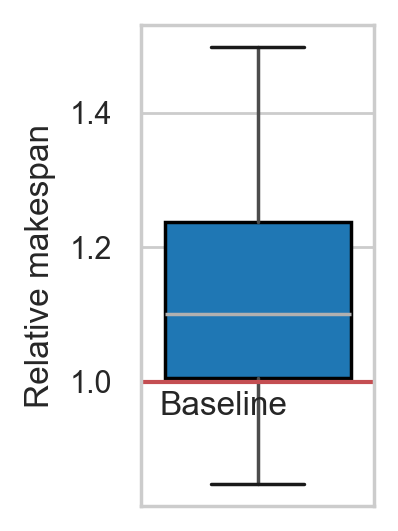

In [12]:
# Draw boxplot comparing the makespan
df_compared = plot.baseline_makespan_compare(*plot.baseline_extract(df_solved, "constraint"))
display(df_compared["makespan"].mean())

colors = {
    "basic": "tab:blue",
    "constraint": "tab:green",
    "modular": "tab:olive",
}
markers = {"constraint": ".", "modular": "*"}

fig = plt.figure(figsize=(1.2, 2.5), dpi=250)
ax = plt.gca()
sns.set(context="paper", style="whitegrid")
df_compared.boxplot(
    column="makespan",
    ax=ax,
    whis=(5, 95),
    widths=0.8,
    patch_artist=True,
    showfliers=False,
    boxprops=dict(facecolor=colors["basic"]),
)
plt.axhline(y=1, color="r")
plt.text(.58, 0.95, "Baseline")

fig.suptitle("")
plt.title("")

plt.ylabel("Relative makespan")
plt.xticks([])
plt.grid(axis="x")
plt.savefig(FIGS_DIR / "makespan_all.pdf", bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

modular_algorithm
cocktail      87.291667
constraint    98.680556
Name: solved, dtype: float64

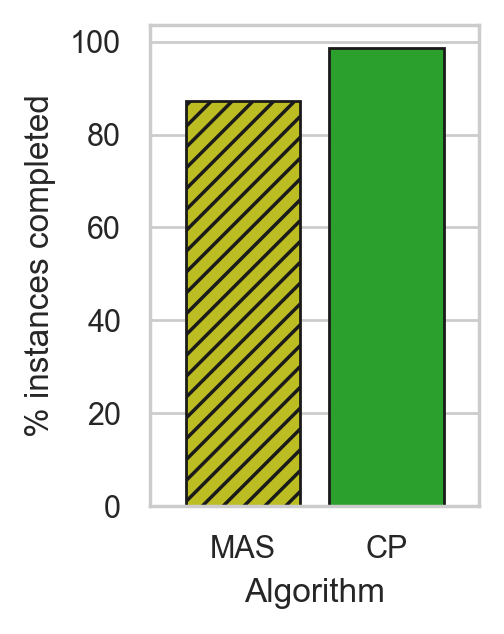

In [13]:
# Draw bar plot comparing number of finished solutions
df_completed = df_all.groupby(["modular_algorithm"])["solved"].mean()*100
display(df_completed)

plt.figure(figsize=FIGSIZE, dpi=250)
sns.set(context="paper", style="whitegrid")
df_completed.plot.bar(
    width=.8,
    edgecolor="k",
    color=[colors["modular"], colors["constraint"]],
    hatch=["////", ""],
)
plt.xticks([0, 1], ["MAS", "CP"], rotation=0)
plt.ylabel("% instances completed")
plt.xlabel("Algorithm")
plt.grid(axis="x")
plt.savefig(FIGS_DIR / "completed.pdf", bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


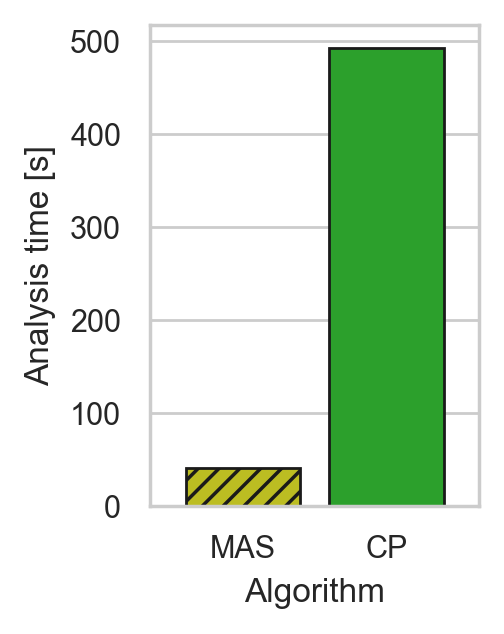

In [14]:
df_tt = df_solved.groupby(["modular_algorithm"])["total_time"].mean()/1000

plt.figure(figsize=FIGSIZE, dpi=250)
sns.set(context="paper", style="whitegrid")
df_tt.plot.bar(
    width=0.8,
    edgecolor="k",
    color=[colors["modular"], colors["constraint"]],
    hatch=["////", ""],
)
plt.xticks([0, 1], ["MAS", "CP"], rotation=0)
plt.ylabel("Analysis time [s]")
plt.xlabel("Algorithm")
plt.grid(axis="x")
plt.savefig(FIGS_DIR / "execution_time_all.pdf", bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()
